In [2]:
include("Main_module.jl")
using .TDQMC
using PyPlot, Distributions, Random

In [3]:
P = Parameter{Float64,Int64}()
Dy = Dynamics{Float64}();

In [4]:
Dy.Trajectory      #系综500,电子数为1

1×250 Matrix{Float64}:
 -0.105875  0.797215  -1.21028  3.68549  …  -0.756291  -0.910349  -0.713547

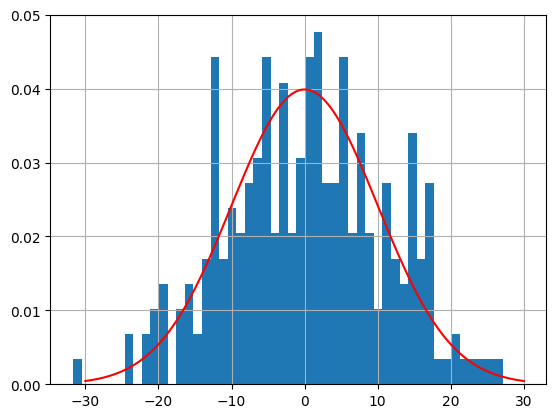

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\86187\.julia\packages\PyCall\3fwVL\src\numpy.jl:67


In [4]:
hist(Dy.Trajectory', 50, density = true);
plot(P.sampling, abs2.(Dy.Guide_Wave[1]), color = "red")
grid()
#xlim(-10, 10)

In [5]:
parallel_CTE!(P, Dy)

[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[2, 1, 1, 1]
[2, 1, 2, 1]
[2, 2, 2, 1]
[2, 2, 2, 2]
[3, 2, 3, 2]
[3, 2, 3, 2]
[3, 3, 3, 2]
[3, 3, 3, 3]
[4, 3, 4, 3]
[4, 3, 4, 3]
[4, 4, 4, 3]
[4, 4, 4, 4]
[5, 4, 4, 4]
[5, 4, 5, 4]
[5, 5, 5, 4]
[5, 5, 5, 5]
[5, 5, 6, 5]
[6, 5, 6, 5]
[6, 6, 6, 5]
[6, 6, 6, 6]
[6, 6, 7, 6]
[7, 6, 7, 6]
[7, 7, 7, 6]
[7, 7, 7, 7]
[7, 7, 8, 7]
[8, 7, 8, 7]
[8, 8, 8, 7]
[8, 8, 8, 8]
[8, 8, 9, 8]
[9, 8, 9, 8]
[9, 9, 9, 8]
[9, 9, 9, 9]
[9, 9, 10, 9]
[10, 9, 10, 9]
[10, 10, 10, 9]
[10, 10, 10, 10]
[11, 10, 10, 10]
[11, 10, 11, 10]
[11, 11, 11, 10]
[11, 11, 11, 11]
[12, 11, 11, 11]
[12, 12, 11, 11]
[12, 12, 12, 11]
[12, 12, 12, 12]
[13, 12, 12, 12]
[13, 13, 12, 12]
[13, 13, 13, 12]
[13, 13, 13, 13]
[14, 13, 13, 13]
[14, 14, 13, 13]
[14, 14, 14, 13]
[14, 14, 14, 14]
[15, 14, 14, 14]
[15, 15, 14, 14]
[15, 15, 15, 14]
[15, 15, 15, 15]
[16, 15, 15, 15]
[16, 16, 15, 15]
[16, 16, 16, 15]
[16, 16, 16, 16]
[17, 16, 16, 16]
[17, 17, 16, 16]
[17, 17, 17, 16]
[17, 17, 17

LoadError: TaskFailedException

[91m    nested task error: [39mBoundsError: attempt to access 5-element extrapolate(scale(interpolate(OffsetArray(::Vector{ComplexF64}, 0:6), BSpline(Cubic(Line(Interpolations.OnGrid())))), (range(-30.0, stop=-29.92, length=5),)), Throw()) with element type ComplexF64 at index [-31.683647088457572]
    Stacktrace:
     [1] [0m[1mthrow_boundserror[22m[0m[1m([22m[90mA[39m::[0mInterpolations.Extrapolation[90m{ComplexF64, 1, Interpolations.ScaledInterpolation{ComplexF64, 1, Interpolations.BSplineInterpolation{ComplexF64, 1, OffsetArrays.OffsetVector{ComplexF64, Vector{ComplexF64}}, Interpolations.BSpline{Interpolations.Cubic{Interpolations.Line{Interpolations.OnGrid}}}, Tuple{Base.OneTo{Int64}}}, Interpolations.BSpline{Interpolations.Cubic{Interpolations.Line{Interpolations.OnGrid}}}, Tuple{LinRange{Float64, Int64}}}, Interpolations.BSpline{Interpolations.Cubic{Interpolations.Line{Interpolations.OnGrid}}}, Interpolations.Throw{Nothing}}[39m, [90mI[39m::[0mTuple[90m{Float64}[39m[0m[1m)[22m
    [90m   @ [39m[90mBase[39m [90m.\[39m[90m[4mabstractarray.jl:691[24m[39m
     [2] [0m[1minbounds_index[22m
    [90m   @ [39m[90mC:\Users\86187\.julia\packages\Interpolations\3gTQB\src\extrapolation\[39m[90m[4mextrapolation.jl:111[24m[39m[90m [inlined][39m
     [3] [0m[1minbounds_position[22m
    [90m   @ [39m[90mC:\Users\86187\.julia\packages\Interpolations\3gTQB\src\extrapolation\[39m[90m[4mextrapolation.jl:102[24m[39m[90m [inlined][39m
     [4] [0m[1m(::Interpolations.Extrapolation{ComplexF64, 1, Interpolations.ScaledInterpolation{ComplexF64, 1, Interpolations.BSplineInterpolation{ComplexF64, 1, OffsetArrays.OffsetVector{ComplexF64, Vector{ComplexF64}}, Interpolations.BSpline{Interpolations.Cubic{Interpolations.Line{Interpolations.OnGrid}}}, Tuple{Base.OneTo{Int64}}}, Interpolations.BSpline{Interpolations.Cubic{Interpolations.Line{Interpolations.OnGrid}}}, Tuple{LinRange{Float64, Int64}}}, Interpolations.BSpline{Interpolations.Cubic{Interpolations.Line{Interpolations.OnGrid}}}, Interpolations.Throw{Nothing}})[22m[0m[1m([22m[90mx[39m::[0mFloat64[0m[1m)[22m
    [90m   @ [39m[35mInterpolations[39m [90mC:\Users\86187\.julia\packages\Interpolations\3gTQB\src\extrapolation\[39m[90m[4mextrapolation.jl:48[24m[39m
     [5] [0m[1mkinetic_part[22m[0m[1m([22m[90mP[39m::[0mParameter[90m{Float64, Int64}[39m, [90mDy[39m::[0mDynamics[90m{Float64}[39m, [90mserial_num[39m::[0mInt64[0m[1m)[22m
    [90m   @ [39m[36mMain.TDQMC.Quantity[39m [90mc:\Users\86187\Code\julia\TDQMC\[39m[90m[4mPhysical_quantity.jl:45[24m[39m
     [6] [0m[1mGroup_Energy[22m[0m[1m([22m[90mP[39m::[0mParameter[90m{Float64, Int64}[39m, [90mDy[39m::[0mDynamics[90m{Float64}[39m, [90mserial_num[39m::[0mInt64[0m[1m)[22m
    [90m   @ [39m[36mMain.TDQMC.Quantity[39m [90mc:\Users\86187\Code\julia\TDQMC\[39m[90m[4mPhysical_quantity.jl:72[24m[39m
     [7] [0m[1mmacro expansion[22m
    [90m   @ [39m[90mc:\Users\86187\Code\julia\TDQMC\[39m[90m[4mParallel_Calculation.jl:76[24m[39m[90m [inlined][39m
     [8] [0m[1m(::Main.TDQMC.Parallelize.var"#162#threadsfor_fun#2"{Parameter{Float64, Int64}, Dynamics{Float64}, SparseArrays.SparseMatrixCSC{ComplexF64, Int64}, SparseArrays.SparseMatrixCSC{ComplexF64, Int64}, Vector{Int64}, UnitRange{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m   @ [39m[36mMain.TDQMC.Parallelize[39m [90m.\[39m[90m[4mthreadingconstructs.jl:85[24m[39m
     [9] [0m[1m(::Main.TDQMC.Parallelize.var"#162#threadsfor_fun#2"{Parameter{Float64, Int64}, Dynamics{Float64}, SparseArrays.SparseMatrixCSC{ComplexF64, Int64}, SparseArrays.SparseMatrixCSC{ComplexF64, Int64}, Vector{Int64}, UnitRange{Int64}})[22m[0m[1m([22m[0m[1m)[22m
    [90m   @ [39m[36mMain.TDQMC.Parallelize[39m [90m.\[39m[90m[4mthreadingconstructs.jl:52[24m[39m

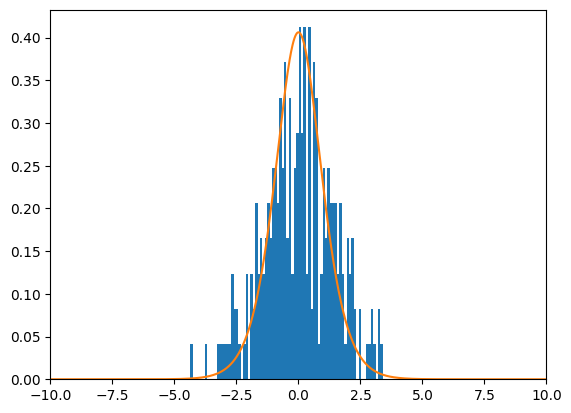

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\86187\.julia\packages\PyCall\3fwVL\src\numpy.jl:67
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [5]:
hist(Dy.Trajectory',80, density = true)
plot(P.sampling, abs2.(Dy.Guide_Wave[1]))
xlim(-10,10)
show()

In [8]:
println(fit(Normal, Dy.Trajectory'))    #拟合粒子的分布

Normal{Float64}(μ=0.008201306415295853, σ=1.4174594956166329)


In [9]:
using LsqFit        #最小二乘非线性拟合
model(x, p) = 1 / (sqrt(2 * pi) * p[2]) * @. exp(-(x - p[1])^2 / (2 * p[2]^2))
ydata = abs2.(Dy.Guide_Wave[1])
p0 = [0.0, 2.0]
#ydata = model(P.sampling, p0)
fit0 = LsqFit.curve_fit(model, P.sampling, ydata, p0)
fit0.param

┌ Info: Precompiling LsqFit [2fda8390-95c7-5789-9bda-21331edee243]
└ @ Base loading.jl:1423


2-element Vector{Float64}:
 -4.497140987778406e-14
  1.0037945806972894

In [10]:
sum(Dy.Energy)/length(Dy.Energy)                 #计算平均能量

-0.6697813654452961

# 对比TDSE和TDQMC得到的基态波函数

In [10]:
using DataFrames, CSV

In [11]:
df = CSV.read("Ground_Wave_Func.csv", DataFrame)
df.wave = @. abs(parse(Complex{Float64}, df.wave))

20001-element Vector{Float64}:
 1.1208304912458287e-15
 1.1367143951546517e-15
 1.1205113177892101e-15
 1.1013859612749383e-15
 1.1089316128421773e-15
 1.0995939085323167e-15
 1.0812377554581884e-15
 1.1060682220461417e-15
 1.0956104221187703e-15
 1.0867108341304914e-15
 1.0828727359932418e-15
 1.0847177137693729e-15
 1.0756448639098743e-15
 ⋮
 1.2113130648594924e-15
 1.1956873740118553e-15
 1.1787224482599777e-15
 1.1780410297091591e-15
 1.1904062490433133e-15
 1.186874263187747e-15
 1.1785519108906926e-15
 1.167680376399767e-15
 1.1657878194378023e-15
 1.1494316044773072e-15
 1.1371993048705045e-15
 1.1380225527311601e-15

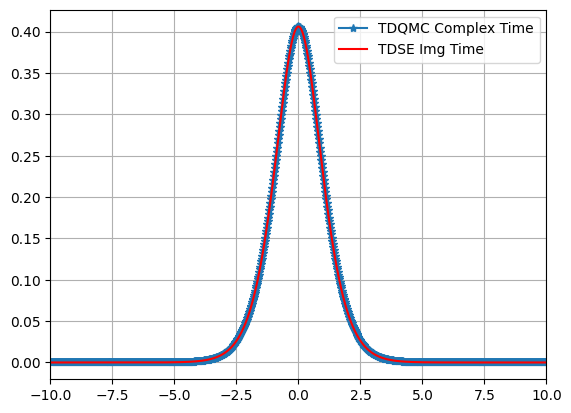

In [12]:
plot(P.sampling, abs2.(Dy.Guide_Wave[1]), marker="*", label = "TDQMC Complex Time")
plot(df.x, abs2.(df.wave), color = "red", label = "TDSE Img Time")
legend()
xlim(-10, 10)
grid()

# 用TDQMC得到基态过程中轨迹随时间的变化

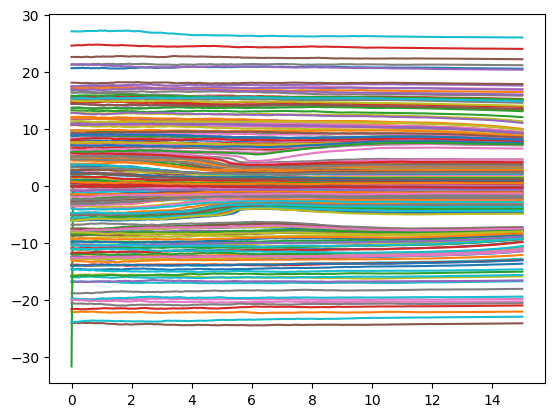

250-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000000764CC10>
 PyObject <matplotlib.lines.Line2D object at 0x000000000764CC70>
 PyObject <matplotlib.lines.Line2D object at 0x000000000764CD90>
 PyObject <matplotlib.lines.Line2D object at 0x000000000764CEB0>
 PyObject <matplotlib.lines.Line2D object at 0x000000000764CFD0>
 PyObject <matplotlib.lines.Line2D object at 0x0000000007658130>
 PyObject <matplotlib.lines.Line2D object at 0x0000000007658250>
 PyObject <matplotlib.lines.Line2D object at 0x0000000007658370>
 PyObject <matplotlib.lines.Line2D object at 0x0000000007658490>
 PyObject <matplotlib.lines.Line2D object at 0x00000000076585B0>
 PyObject <matplotlib.lines.Line2D object at 0x000000000764CC40>
 PyObject <matplotlib.lines.Line2D object at 0x000000000787EAF0>
 PyObject <matplotlib.lines.Line2D object at 0x00000000076586D0>
 ⋮
 PyObject <matplotlib.lines.Line2D object at 0x00000000076B6A00>
 PyObject <matplotlib.lines.Line2D object at 0x000

In [13]:
plot(real(P.Δt).* (0:P.step_t), Dy.Displace[:, :, 1])

In [9]:
findall(x->isempty(x),Dy.Index)
Dy.In_num[83]  


1-element Vector{Int64}:
 1

# 对比舍选法得到的基态的能量

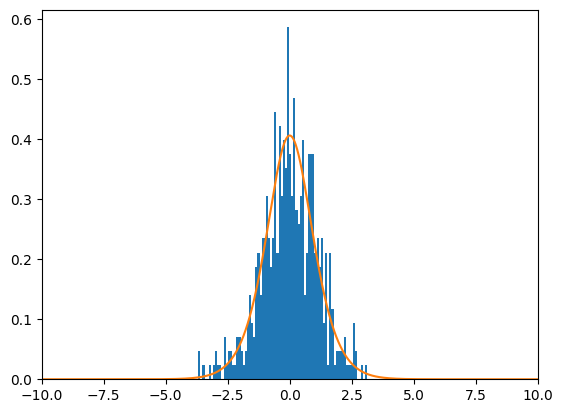

(-10.0, 10.0)

In [11]:
Vector_ch = choose(500, x = P.sampling, y = abs2.(Dy.Guide_Wave[1]))
hist(Vector_ch, 80, density = true)
plot(P.sampling, abs2.(Dy.Guide_Wave[1]))
xlim(-10, 10)

In [12]:
Dy.Trajectory[:] = Vector_ch

for i in 1:P.Group
    Dy.Energy[i] = Group_Energy(P, Dy, i)
end

sum(Dy.Energy) / length(Dy.Energy)   

-0.669778147485088